# DATASET 2017


In [2]:
install.packages("data.table", dependencies=TRUE)
install.packages("DataExplorer", dependencies=TRUE)

library(data.table)
library(DataExplorer)
library(ggplot2)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
load("vrawu17.RData")
head(vrawu17)

codigo_tipo_linha,cod_justificativa,icao_empresa,codigo_di,icao_destino,icao_origem,timekey_partida,voo,partida_prevista,partida_real,⋯,destino_descricao,destino_cidade,destino_uf,destino_pais,destino_continente,descricao_codigo_di,empresa,nacionalidade,descricao_justificativa,tipo_linha
,XN,LTG,0,SCDA,SBEG,201708131500,8484,2017-08-13 15:20:00,NA,⋯,DIEGO ARACENA INTERNATIONAL AIRPORT,IQUIQUE,NA,CHILE,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XB,TPA,0,SBCT,KMIA,201708130900,843,2017-08-13 09:00:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,TAMPA S/A,ESTRANGEIRA,AUTORIZADO,NA
,NA,LTG,0,SVMI,SBEG,201708132100,8472,2017-08-13 21:42:00,2017-08-13 23:46:00,⋯,SIMON BOLIVAR INTERNATIONAL AIRPORT (MAIQUETIA INTERNATIONAL AIRPORT),CARACAS/INTL,NA,VENEZUELA,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,NA,NA
,XN,LCO,0,SBKP,SBEG,201708140100,1509,2017-08-14 01:25:00,NA,⋯,VIRACOPOS,CAMPINAS,SP,BRASIL,AMERICA DO SUL,Vôo Regular,LAN CARGO S.A,ESTRANGEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,GLO,0,SBCT,SBPA,201708131300,1986,2017-08-13 13:02:00,NA,⋯,AFONSO PENA,SÃO JOSÉ DOS PINHAIS,PR,BRASIL,AMERICA DO SUL,Vôo Regular,GOL,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA
,XN,LTG,0,SGES,SGAS,201708130800,8443,2017-08-13 08:00:00,NA,⋯,GUARANI INTERNATIONAL AIRPORT,CIDADE DEL ESTE,NA,PARAGUAI,AMERICA DO SUL,Vôo Regular,ABSA,BRASILEIRA,CANCELAMENTO POR MOTIVOS TÉCNICOS / OPERACIONAIS,NA


#### Dados ausentes por característica:


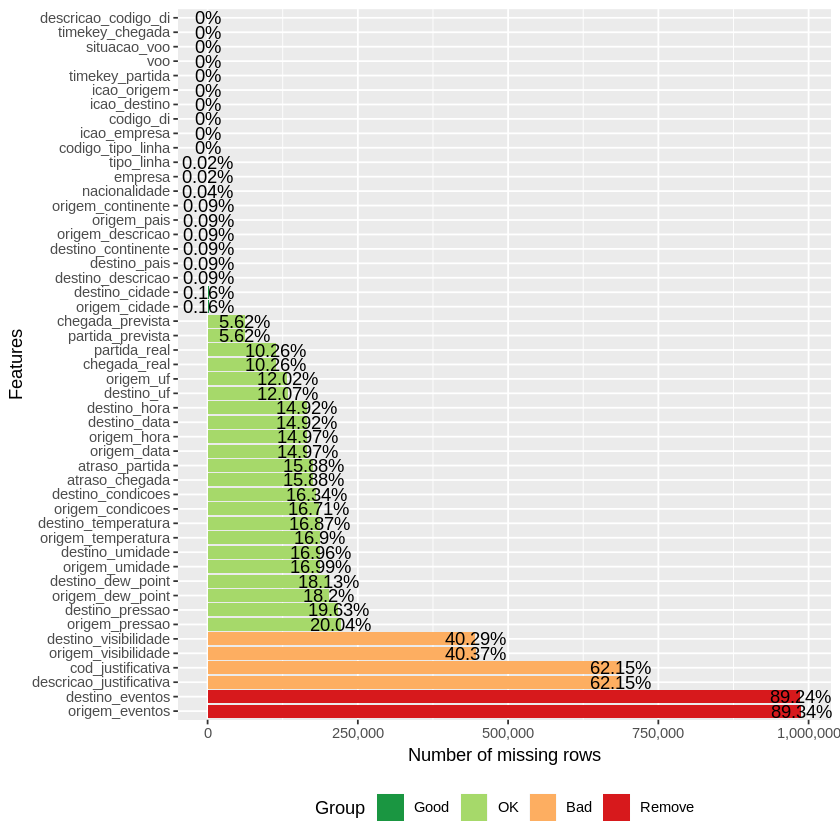

In [12]:
plot_missing(vrawu17)

### Clearing


In [5]:
# Eliminando com mais de 50% missing
c_vrawu17 <- vrawu17
c_vrawu17 <- c_vrawu17[, colMeans(is.na(c_vrawu17)) <= .5]

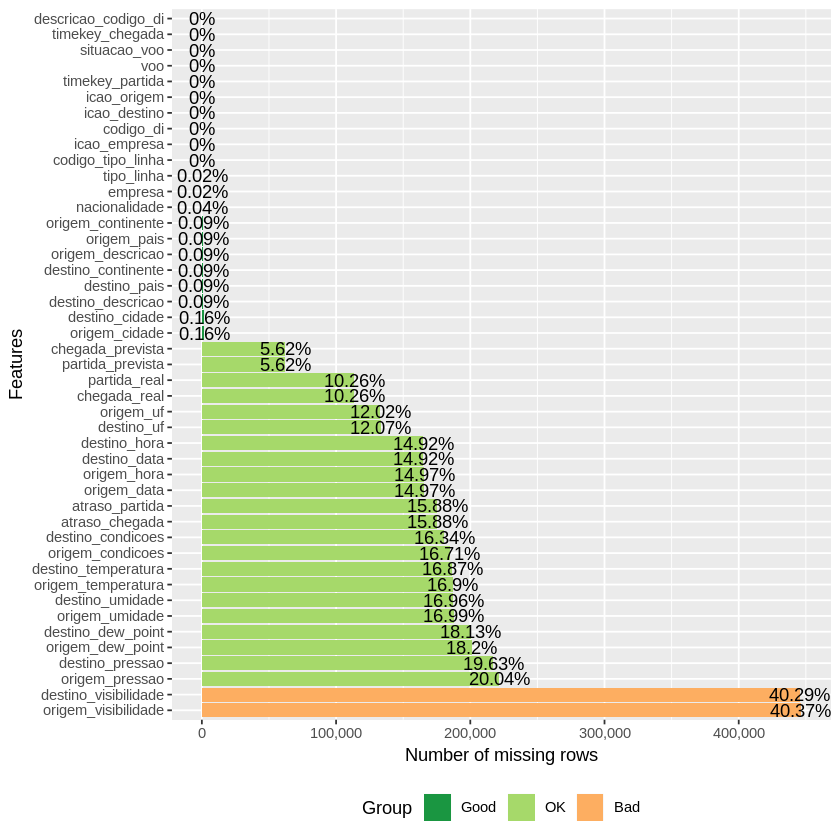

In [27]:
plot_missing(c_vrawu17)

### Agregando alguns dados

In [6]:
rm(vrawu17)
fl17 <- c_vrawu17
'%!in%' <- function(x,y)!('%in%'(x,y))

In [7]:
#Filtrando atrasos com mais de 10 min (partida e chegada)
fl17 <- fl17[fl17$atraso_partida > 10 & fl17$atraso_chegada > 10,]

In [8]:
# Agregando para outros
fl17[which(fl17$icao_empresa %!in% c(names(sort(table(fl17$icao_empresa), decreasing=T)[1:15]))),]$icao_empresa <- "OUTRAS"
fl17[which(fl17$icao_origem %!in% c(names(sort(table(fl17$icao_origem), decreasing=T)[1:15]))),]$icao_origem <- "OUTRAS"
fl17[which(fl17$icao_destino %!in% c(names(sort(table(fl17$icao_destino), decreasing=T)[1:15]))),]$icao_destino <- "OUTROS"
fl17[which(fl17$destino_cidade %!in% c(names(sort(table(fl17$destino_cidade), decreasing=T)[1:15]))),]$destino_cidade <- "OUTROS"
fl17[which(fl17$destino_descricao %!in% c(names(sort(table(fl17$destino_descricao), decreasing=T)[1:15]))),]$destino_descricao <- "OUTROS"
fl17[which(fl17$empresa %!in% c(names(sort(table(fl17$empresa), decreasing=T)[1:15]))),]$empresa <- "OUTROS"
fl17[which(fl17$origem_descricao %!in% c(names(sort(table(fl17$origem_descricao), decreasing=T)[1:15]))),]$origem_descricao <- "OUTROS"
fl17[which(fl17$origem_cidade %!in% c(names(sort(table(fl17$origem_cidade), decreasing=T)[1:15]))),]$origem_cidade <- "OUTROS"


#Convertendo datas
fl17$timekey_partida <- strptime(fl17$timekey_partida, '%Y%m%d%H%M')
fl17$timekey_chegada <- strptime(fl17$timekey_chegada, '%Y%m%d%H%M')
fl17$origem_data <- as.Date(fl17$origem_data)
fl17$destino_data <- as.Date(fl17$destino_data)


In [114]:
introduce(fl17)

rows,columns,discrete_columns,continuous_columns,all_missing_columns,total_missing_values,total_observations,memory_usage
301849,45,34,11,0,6796712,13583205,152283912


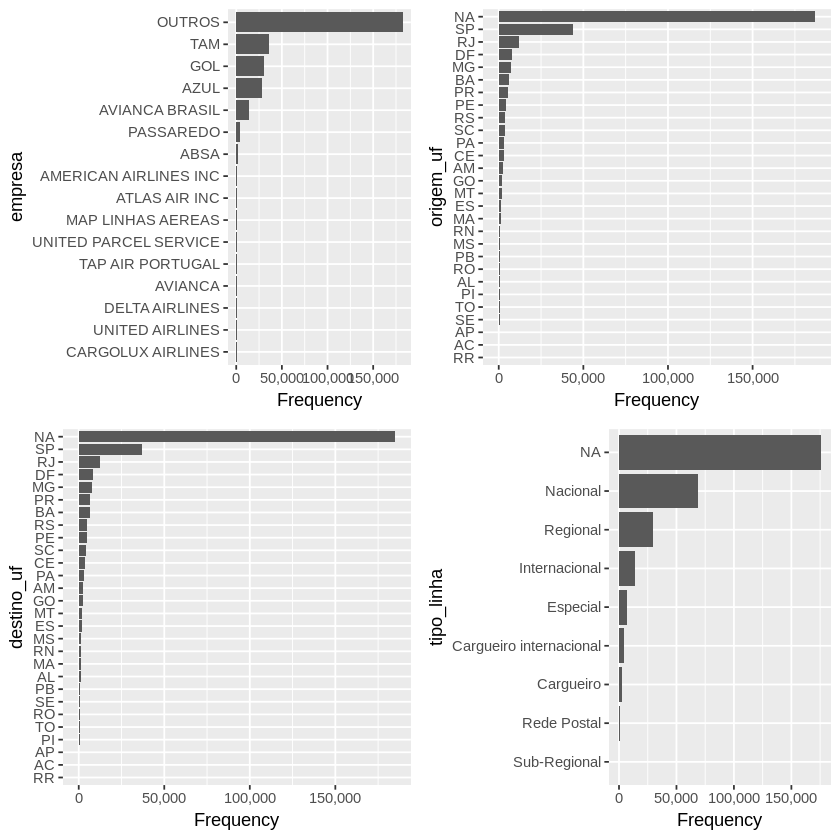

In [119]:
plot_bar(fl17[c("empresa","origem_uf","destino_uf","tipo_linha")])



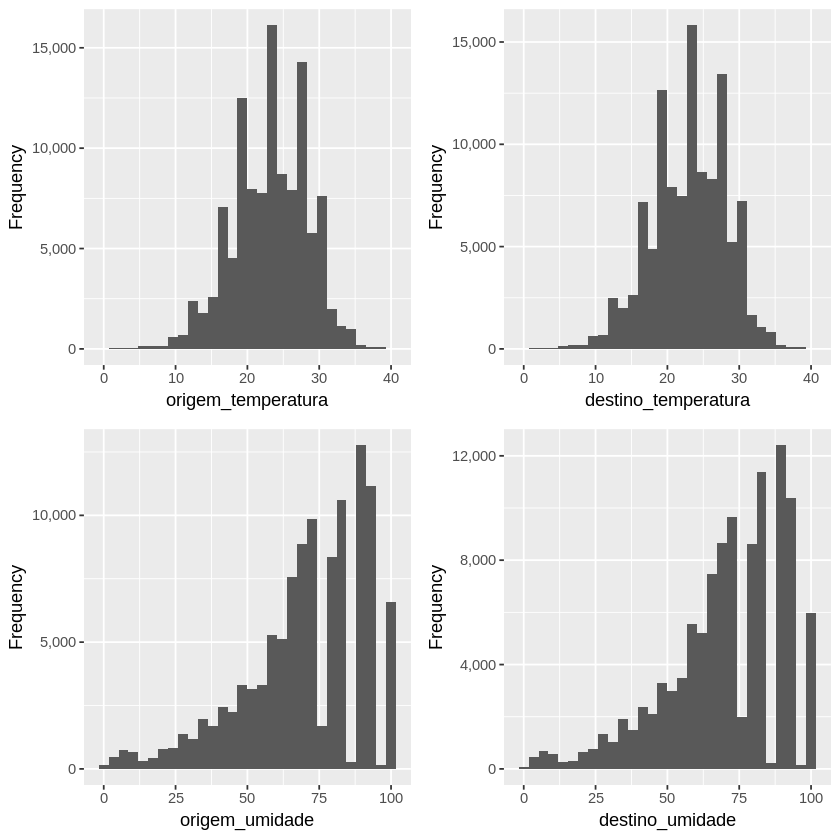

In [120]:
plot_histogram(fl17[c("origem_temperatura", "destino_temperatura","origem_umidade", "destino_umidade")])

In [1]:
plot_scatterplot(fl17, by="origem_temperatura")

ERROR: Error in plot_scatterplot(fl17, by = "origem_temperatura"): could not find function "plot_scatterplot"


In [95]:
#plot_bar(fl17)
#plot_str(fl17)
#head(fl17$origem_data, n=20)
#head(format(strptime(fl17$timekey_partida, '%Y%m%d%H%M'), '%H:%M %d/%m/%Y'), n=20)

#PCA
plot_prcomp(fl17) 

10 features with more than 50 categories ignored!
timekey_partida: 8564 categories
partida_prevista: 74368 categories
partida_real: 105020 categories
chegada_prevista: 78274 categories
chegada_real: 106169 categories
timekey_chegada: 8601 categories
atraso_partida: 1394 categories
atraso_chegada: 1449 categories
origem_data: 366 categories
destino_data: 366 categories



ERROR: Error in make.names(paste0(x, "_", get(x))): invalid multibyte string 44


18 features with more than 20 categories ignored!
timekey_partida: 8564 categories
partida_prevista: 74368 categories
partida_real: 105020 categories
chegada_prevista: 78274 categories
chegada_real: 106169 categories
timekey_chegada: 8601 categories
atraso_partida: 1394 categories
atraso_chegada: 1449 categories
origem_data: 366 categories
origem_hora: 25 categories
origem_condicoes: 37 categories
destino_data: 366 categories
destino_hora: 25 categories
destino_condicoes: 37 categories
origem_uf: 28 categories
origem_pais: 41 categories
destino_uf: 28 categories
destino_pais: 41 categories

Warning message in cor(final_data, ...):
“the standard deviation is zero”

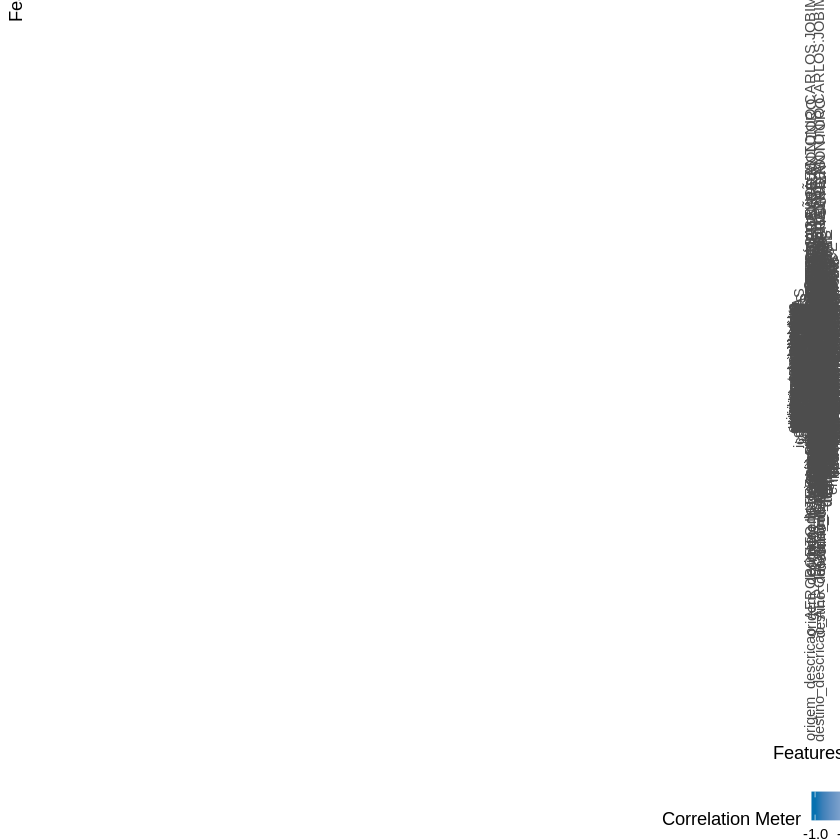

In [121]:
plot_correlation(fl17, maxcat = 20L, use = "pairwise.complete.obs")